<a href="https://colab.research.google.com/github/YazGonzalezHerrera/Ecuaciones-Diferenciales-Parciales-2/blob/main/M%C3%A9todo%20de%20m%C3%ADnimos%20cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de mínimos cuadrados**

Queremos resolver la ecuación:

$\frac{d^2u}{dx^2} + u = x$

Sujeta a las condiciones:

$u(0) = 0$ , $u'(0)=2$

Usaremos cálculo simbolico y compararemos la solución numérica contra la analítica

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

**Solucíon analítica**

In [11]:
x, a, b, c, d = sp.symbols('x a b c d')
u = sp.Function('u')

In [12]:
ode = u(x).diff(x, x) + u(x) - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [13]:
sol = sp.dsolve(ode, ics = {u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})

In [14]:
sol

Eq(u(x), x + sin(x))

In [15]:
u_expr = sol.rhs #parte derecha de sol

u_num = sp.lambdify(x, u_expr, "numpy") #Se redefine como arreglo

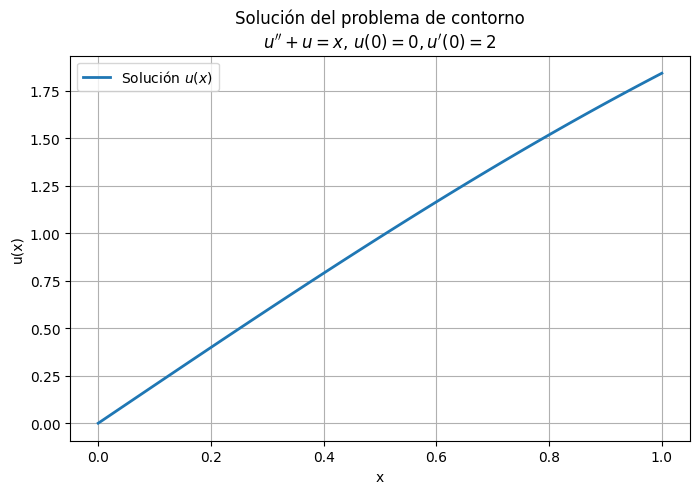

In [16]:
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title("Solución del problema de contorno\n$u'' + u = x$, $u(0)=0, u'(0)=2$")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

**Solución numérica**

Aplicando las condiciones inciales

$u(0) = 0\rightarrow a = 0$

$u'(0) = 2\rightarrow b = 2$

Proponemos la función de prueba:

In [20]:
a = 0
b = 2
u_n = a + b*x + c*x**2 + d*x**3

In [21]:
u_n

c*x**2 + d*x**3 + 2*x

Y definimos el residuo (o error), E

In [22]:
u_n_2 = sp.diff(u_n, x, 2) #Segunda derivada

#E(x)
E = u_n_2 + u_n - x

In [23]:
E

c*x**2 + d*x**3 + x + 2*(c + 3*d*x)

In [24]:
E.simplify()

c*x**2 + 2*c + d*x**3 + 6*d*x + x

Imponemos las condiciones para obtener los puntos críticos del residuo:

$\frac{\partial }{\partial a}\int\limits_0^1E^2dx=0$

$\frac{\partial }{\partial b}\int\limits_0^1E^2dx=0$

y resolvemos el sistema de ecuaciones resultante:

In [25]:
I = sp.integrate(E**2, (x, 0, 1))

In [26]:
I

83*c**2/15 + 49*c*d/3 + 5*c/2 + 509*d**2/35 + 22*d/5 + 1/3

In [29]:
dIc = sp.diff(I, c)
dId = sp.diff(I, d)

In [30]:
print(dIc, "\n", dId)

166*c/15 + 49*d/3 + 5/2 
 49*c/3 + 1018*d/35 + 22/5


In [31]:
soleq = sp.solve([dIc, dId], [c, d], simplify = True) #Para igualar a 0
soleq

{c: -1335/86789, d: -24759/173578}

In [60]:
#Sustituir en la ecuación de prueba
u_approx = E.subs(soleq)

In [61]:
print("\nSolución aproximada por mínimos cuadrados:")
sp.pprint(u_approx)


Solución aproximada por mínimos cuadrados:
         3         2                  
  24759⋅x    1335⋅x    12512⋅x   2670 
- ──────── - ─────── + ─────── - ─────
   173578     86789     86789    86789


In [62]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

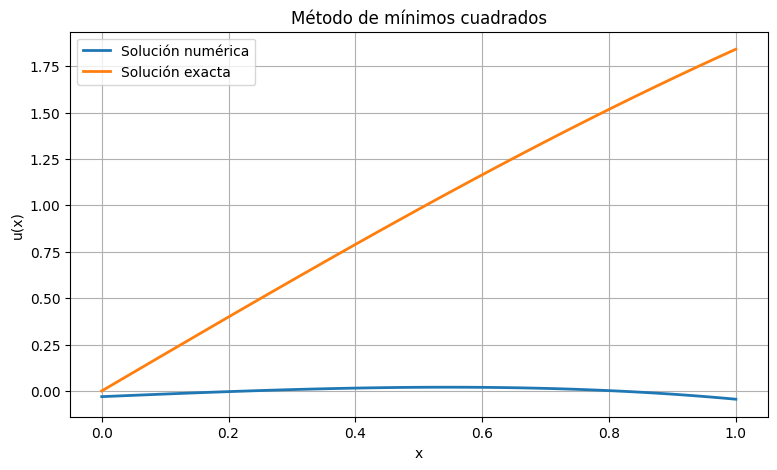

In [64]:
#Solución analítica y numérica
xx = np.linspace(0, 1, 100)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Solución numérica", linewidth=2)
plt.plot(xx, yy, label="Solución exacta", linewidth=2)

plt.title("Método de mínimos cuadrados")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

In [67]:
#Calculamos el error
error = np.abs(yy - u_approx_fn(xx))
error_max = np.max(error)
print("Error máximo: ", error_max)

Error máximo:  1.886090694678963
